In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


In [2]:
filename = 'BookiesProject.csv'
df = pd.read_csv(filename)
no_teams_df = df.drop(columns=['Date', 'Unnamed: 0', 'HomeTeam', 'AwayTeam', 'FTR']).copy()



In [11]:
X = no_teams_df.drop(["TARGET"], axis = 1)
y = no_teams_df[["TARGET"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
report = metrics.classification_report(predicted, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       729
           1       0.52      0.58      0.55       363

    accuracy                           0.68      1092
   macro avg       0.65      0.66      0.65      1092
weighted avg       0.69      0.68      0.69      1092



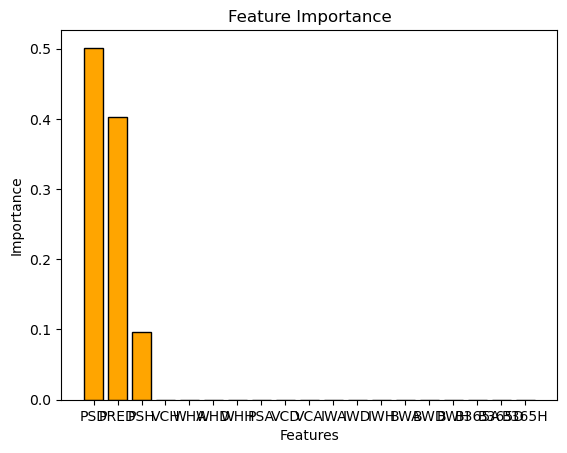

In [4]:
import matplotlib.pyplot as plt

# find each features importance in clf, then return indexes of each features
# importance from most important to least, then get column for each index
importances = clf.feature_importances_
sorted_index_lst = importances.argsort()[::-1]
ordered_col_names = [X.columns[i] for i in sorted_index_lst]

plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[sorted_index_lst], 
        align='center', color='orange', edgecolor='black')
plt.xticks(range(len(importances)), ordered_col_names)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [5]:
#work on testing df with Teams Label Encoded
#get DF with teams Label Encoded
LE_df = df

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform the home & away columns using the same label encoder
LE_df['HomeTeam_encoded'] = label_encoder.fit_transform(LE_df['HomeTeam'])
LE_df['AwayTeam_encoded'] = label_encoder.transform(LE_df['AwayTeam'])

RF_df = LE_df.drop(columns=['HomeTeam', 'AwayTeam', 'Unnamed: 0', 'FTR'])

LE_df = LE_df.drop(columns=['HomeTeam', 'AwayTeam', 'Date', 'Unnamed: 0', 'FTR'])

print(LE_df.head(15))

    B365H  B365D  B365A   BWH   BWD    BWA   IWH  IWD    IWA   PSH  ...   WHH  \
0    1.40   4.50   8.50  1.35  4.60   9.00  1.35  4.5   7.30  1.44  ...  1.44   
1    1.80   3.60   4.50  1.80  3.50   4.40  1.80  3.4   4.00  1.82  ...  1.85   
2    2.50   3.40   2.75  2.60  3.30   2.75  2.40  3.2   2.70  2.65  ...  2.70   
3    2.00   3.40   3.80  2.00  3.40   3.60  2.10  3.3   3.10  2.05  ...  2.00   
4    2.38   3.25   3.10  2.40  3.20   3.10  2.40  3.2   2.70  2.40  ...  2.40   
5    4.20   3.50   1.91  4.10  3.50   1.85  3.30  3.3   2.00  4.39  ...  3.80   
6    2.20   3.30   3.40  2.25  3.30   3.30  2.15  3.3   3.00  2.26  ...  2.30   
7    1.17   7.00  17.00  1.18  6.25  16.00  1.17  5.8  13.00  1.20  ...  1.20   
8    6.00   3.75   1.62  6.00  3.90   1.55  5.50  3.9   1.50  6.05  ...  5.50   
9    4.33   3.60   1.83  4.60  3.50   1.83  3.80  3.4   1.85  4.27  ...  4.33   
10   1.25   5.50  13.00  1.25  5.25  12.50  1.25  5.0  10.00  1.27  ...  1.29   
11   2.90   3.40   2.40  2.9

In [12]:
X = LE_df.drop(["TARGET"], axis = 1)
y = LE_df[["TARGET"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
report = metrics.classification_report(predicted, y_test)
print(report)

import matplotlib.pyplot as plt

# find each features importance in clf, then return indexes of each features
# importance from most important to least, then get column for each index
importances = clf.feature_importances_
sorted_index_lst = importances.argsort()[::-1]
ordered_col_names = [X.columns[i] for i in sorted_index_lst]

plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[sorted_index_lst], 
        align='center', color='orange', edgecolor='black')
plt.xticks(range(len(importances)), ordered_col_names)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

#averaging around 52-54% precision

NameError: name 'LE_df' is not defined

In [7]:
#Chat gpt's attempt at maximizing Precision
#getting around 58% precision every time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_score

# Assuming your target variable is named "TARGET"
X = LE_df.drop(["TARGET"], axis=1)
y = LE_df["TARGET"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Make predictions on the test set
predicted_proba = clf.predict_proba(X_test)[:, 1]  
threshold = 0.5  # Adjust this threshold to maximize precision

# Convert probabilities to binary predictions based on the threshold
predicted = (predicted_proba > threshold).astype(int)

# Evaluate the classifier's performance
precision = precision_score(y_test, predicted)
report = classification_report(y_test, predicted)

print(f"Precision: {precision:.4f}")
print(report)

Precision: 0.5799
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       565
           1       0.58      0.50      0.54       309

    accuracy                           0.70       874
   macro avg       0.66      0.65      0.66       874
weighted avg       0.69      0.70      0.69       874



In [8]:
from sklearn.ensemble import RandomForestClassifier
#take RF dataframe and change the dates to datetime format, in UK format *dayfirst = True
RF_df['Date'] = pd.to_datetime(RF_df['Date'], dayfirst = True, errors='coerce')


In [9]:
#We will also add a daycode that represents what day of the week the game was played, adding additional info to the dataset
RF_df["Day_Code"]= RF_df["Date"].dt.dayofweek


In [10]:
rf = RandomForestClassifier(n_estimators=75, min_samples_split= 10, random_state=1)

In [11]:
train = RF_df[RF_df["Date"] < '24-05-21']
train = train.dropna()

In [12]:
test = RF_df[RF_df["Date"] > '24-05-21']
test = test.dropna()

In [13]:
predictors = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD',
       'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA',
       'PRED', 'HomeTeam_encoded', 'AwayTeam_encoded', "Day_Code"]


In [14]:
rf.fit(train[predictors], train["TARGET"])

RandomForestClassifier(min_samples_split=10, n_estimators=75, random_state=1)

In [15]:
preds = rf.predict(test[predictors])

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
acc = accuracy_score(test["TARGET"], preds)

In [18]:
acc

0.6634920634920635

In [19]:
from sklearn.metrics import precision_score

In [20]:
precision_score(test["TARGET"], preds)

0.5061224489795918

In [21]:
combined = pd.DataFrame(dict(actual=test["TARGET"], prediction=preds))
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,503,121
1,197,124


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier
X = LE_df.drop(["TARGET"], axis=1)
y = LE_df["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = [ ('encoder', TargetEncoder()), ('clf', XGBClassifier(random_state=8))]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])